In [1]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use('ggplot')

In [2]:
# Chargement du fichier
df1 = pd.read_csv("/content/data.csv")
df2 = pd.read_csv("/content/unique_m.csv")

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(df1)
#df1 = pd.DataFrame(scaled_feature,columns = df1.columns)

In [4]:
#Target
Y=df1["critical_temp"]

In [5]:
df1.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [6]:
print("Le nombre de valeur manquantes de df1 : ", df1.isnull().sum().sum())

Le nombre de valeur manquantes de df1 :  0


In [7]:
df2.head()

H  He   Li   Be    B    C    N    O    F  Ne  ...   Au   Hg   Tl   Pb  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Bi  Po  At  Rn  critical_temp                material  
0  0.0   0   0   0           29.0         Ba0.2La1.8Cu1O4  
1  0.0   0   0   0           26.0  Ba0.1La1.9Ag0.1Cu0.9O4  
2  0.0   0   0   0           19.0         Ba0.1La1.9Cu1O4  
3  0.0   0   0   0           22.0       Ba0.15La1.85Cu1O4  
4  0.0   0   0   0           23.0         Ba0.3La1.7Cu1O4  

[5 rows x 88 columns]

La dataframe contient la composition chimique des différents supraconducteurs, qui donne les propriétés de masse atomique de la conductivité thermique, du rayon atomique etc. Il n'est donc pas nécéssaire de prendre en compte ces données pour la suite

In [8]:
print("Le nombre de valeur manquantes de df1 : ", df1.isnull().sum().sum())

Le nombre de valeur manquantes de df1 :  0


In [9]:
def visualisation(df):
  # Appliquer la méthode PCA pour réduire la dimensionnalité en 2 composantes principales
  pca = PCA(n_components=2)
  X_pca = pca.fit_transform(df)

  # Visualiser la distribution des données par rapport à la variable cible continue (Y)
  plt.figure(figsize=(15, 10))
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', marker='o', edgecolors='k')
  plt.title('Distribution des données par rapport à la température')
  plt.xlabel('Composante Principale 1')
  plt.ylabel('Composante Principale 2')
  plt.colorbar(label='critical_temp')
  plt.grid(True)
  plt.show()


## **Visualisation de toutes les features**

In [10]:
#Préparation des vecteurs
X_all=df1.iloc[:, 0:82]

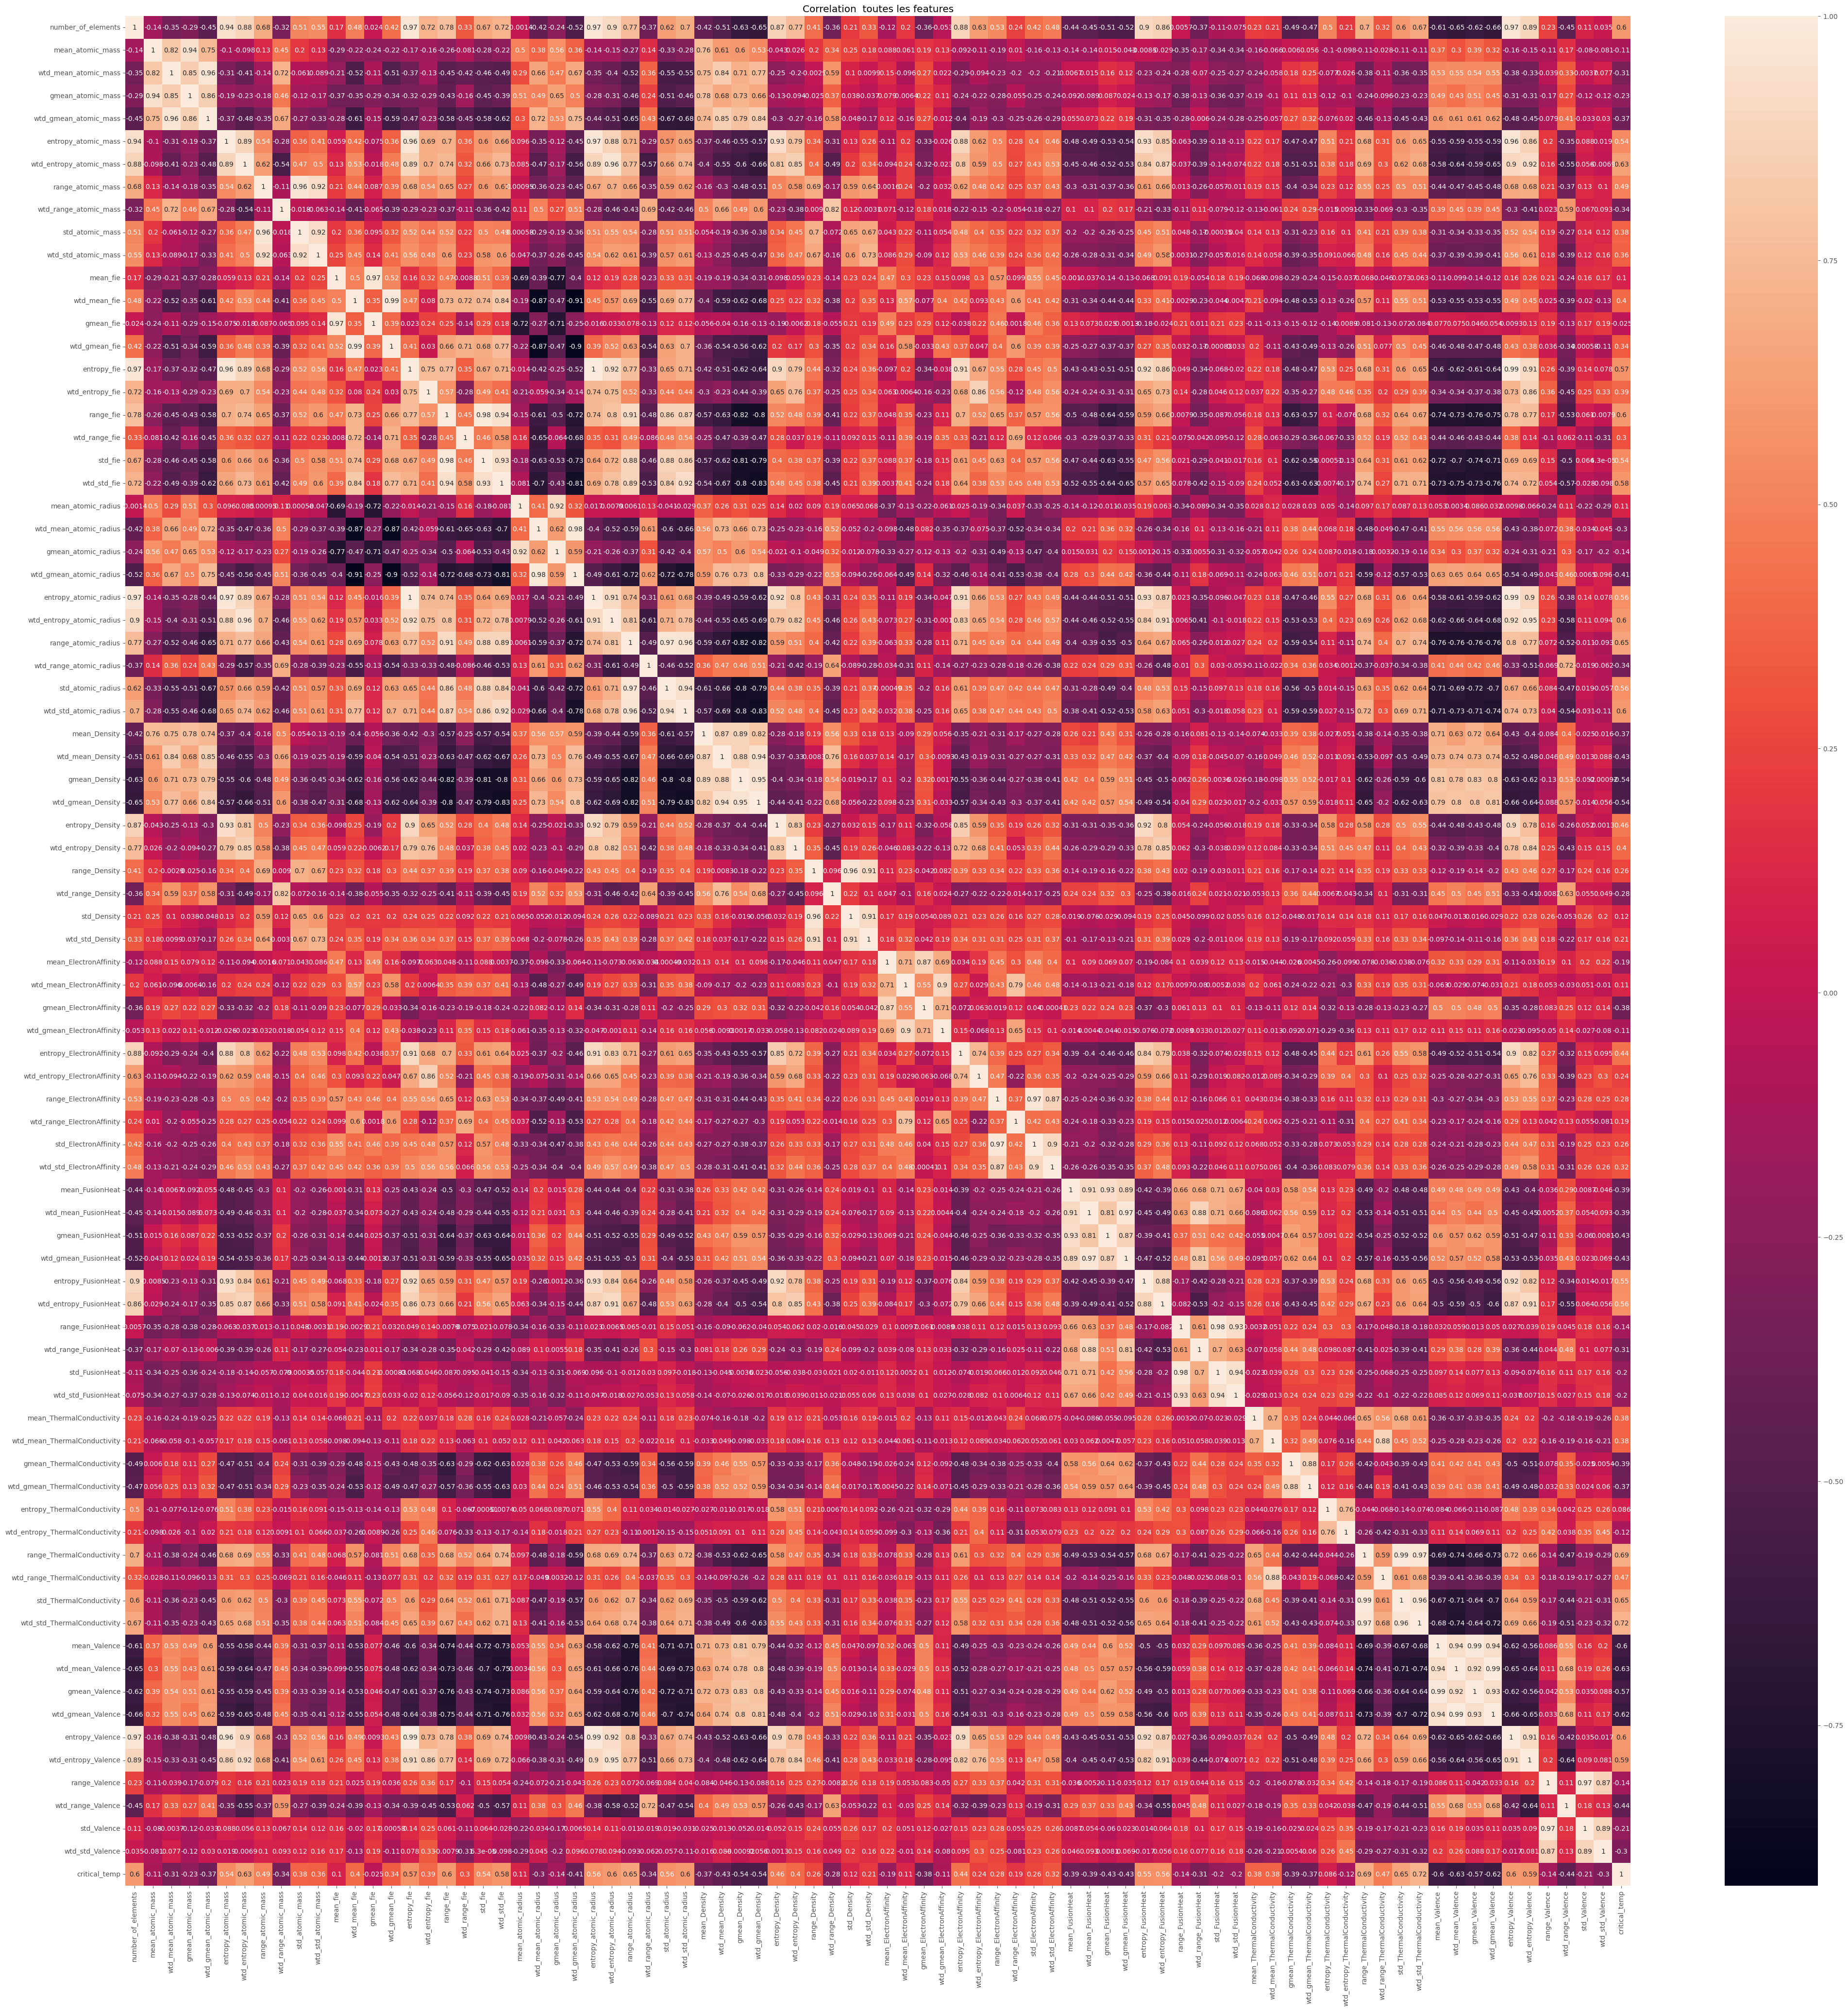

In [11]:
plt.figure(figsize = (50, 50))
plt.title("Correlation  toutes les features")
sns.heatmap(X_all.corr(), annot=True)
plt.show()

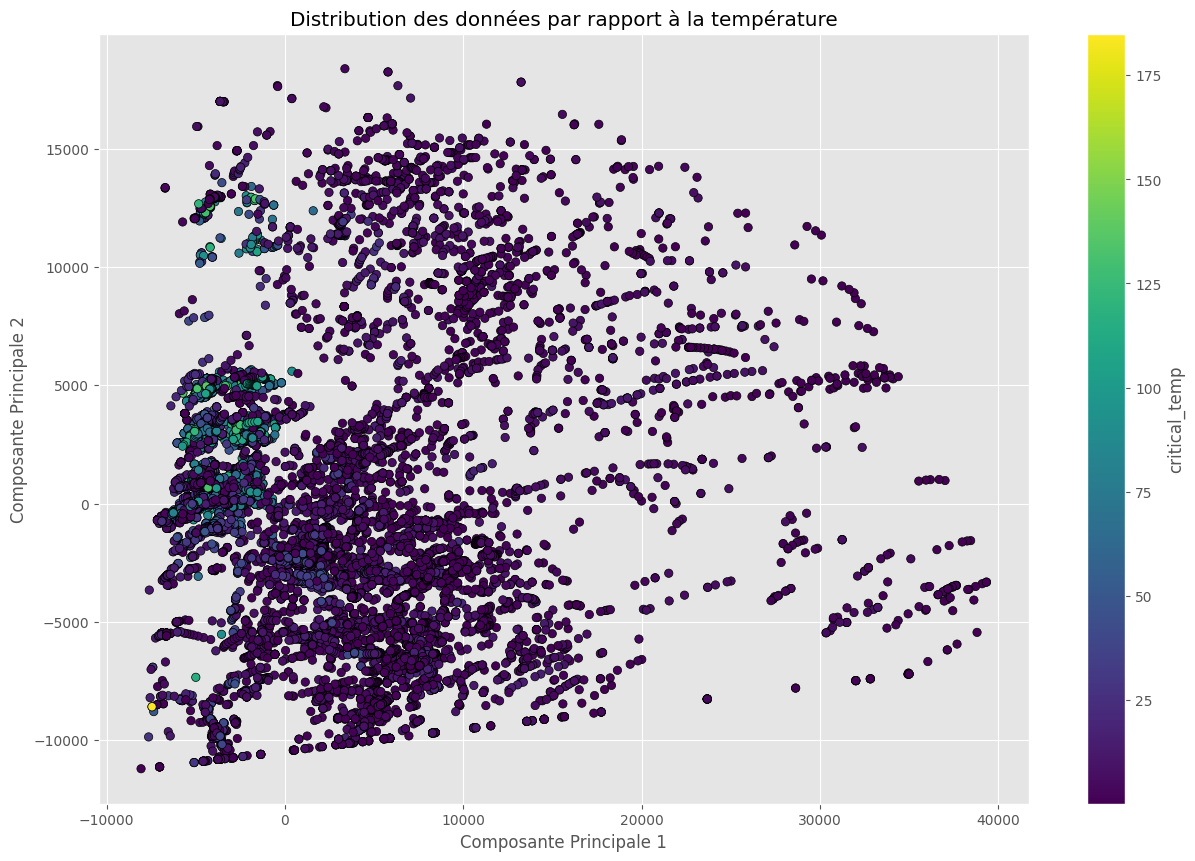

In [12]:
visualisation(X_all)

In [13]:
def show_outliers(df):
  num_features = len(df.columns)
  num_rows = num_features // 5 + (1 if num_features % 5 != 0 else 0)
  num_cols = 5

  # Créer les subplots
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

  for i, feature in enumerate(df.columns):
      ax = axes[i // num_cols, i % num_cols]  # Sélectionner l'axe correspondant
      df[feature].plot(kind='box', ax=ax)
      ax.set_title(feature, fontsize=10)

  plt.tight_layout()
  plt.show()

## **Selection de features basée la correlation de Person**

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Sélectionner les caractéristiques les plus pertinentes en fonction de la corrélation avec la variable cible
selector = SelectKBest(score_func=f_regression, k=20)  # Nombre de caractéristiques à sélectionner (20)
X_selected = selector.fit_transform(X_all, Y)  # X_all est votre DataFrame contenant toutes les features

selected_columns = X_all.columns[ selector.get_support(indices=True)]

X_selected_df = X_all[selected_columns]

X_selected_df.head()

number_of_elements  wtd_entropy_atomic_mass  entropy_fie  range_fie  \
0                   4                 1.062396     1.305967      810.6   
1                   5                 1.057755     1.544145      810.6   
2                   4                 0.975980     1.305967      810.6   
3                   4                 1.022291     1.305967      810.6   
4                   4                 1.129224     1.305967      810.6   

   wtd_std_fie  entropy_atomic_radius  wtd_entropy_atomic_radius  \
0   355.562967               1.259244                   1.207040   
1   354.963511               1.508328                   1.204115   
2   354.804183               1.259244                   1.132547   
3   355.183884               1.259244                   1.173033   
4   356.319281               1.259244                   1.261194   

   range_atomic_radius  std_atomic_radius  wtd_std_atomic_radius  \
0                  205          75.237540              69.235569   
1                  205          67.321319              68.008817   
2                  205          75.237540              67.797712   
3                  205          75.237540              68.521665   
4                  205          75.237540              70.634448   

   wtd_entropy_FusionHeat  range_ThermalConductivity  std_ThermalConductivity  \
0                0.994998                  399.97342               168.854244   
1                1.073094                  429.97342               198.554600   
2                0.927479                  399.97342               168.854244   
3                0.964031                  399.97342               168.854244   
4                1.044970                  399.97342               168.854244   

   wtd_std_ThermalConductivity  mean_Valence  wtd_mean_Valence  gmean_Valence  \
0                   138.517163          2.25          2.257143       2.213364   
1                   139.630922          2.00          2.257143       1.888175   
2                   138.540613          2.25          2.271429       2.213364   
3                   138.528893          2.25          2.264286       2.213364   
4                   138.493671          2.25          2.242857       2.213364   

   wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  
0           2.219783         1.368922             1.066221  
1           2.210679         1.557113             1.047221  
2           2.232679         1.368922             1.029175  
3           2.226222         1.368922             1.048834  
4           2.206963         1.368922             1.096052

<Axes: title={'center': 'Correlation  features SelectKbest'}>

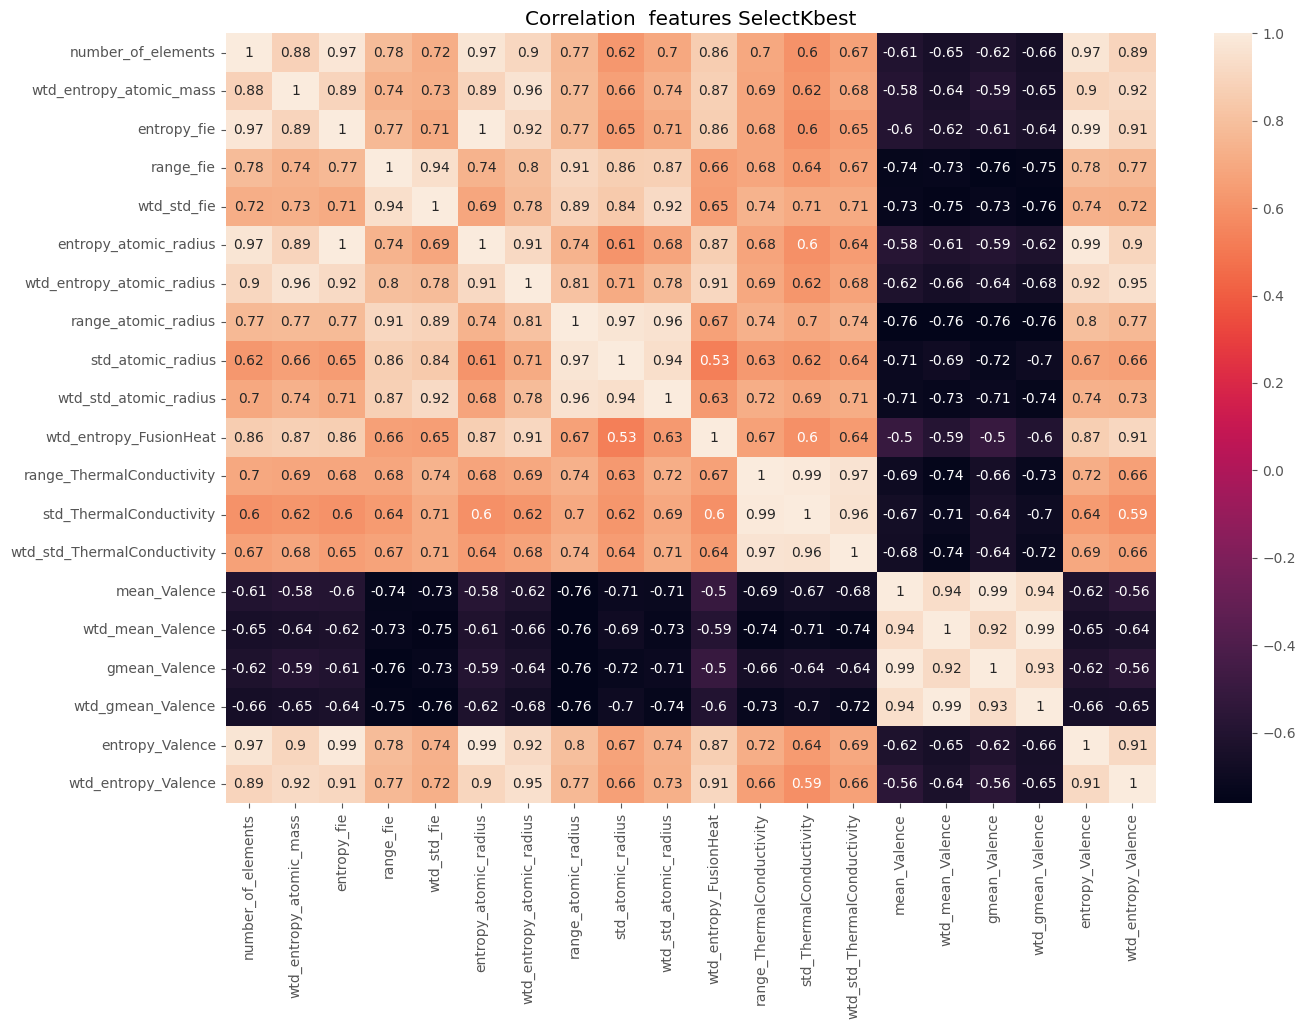

In [15]:
plt.figure(figsize = (15, 10))
plt.title("Correlation  features SelectKbest")
sns.heatmap(X_selected_df.corr(), annot=True)

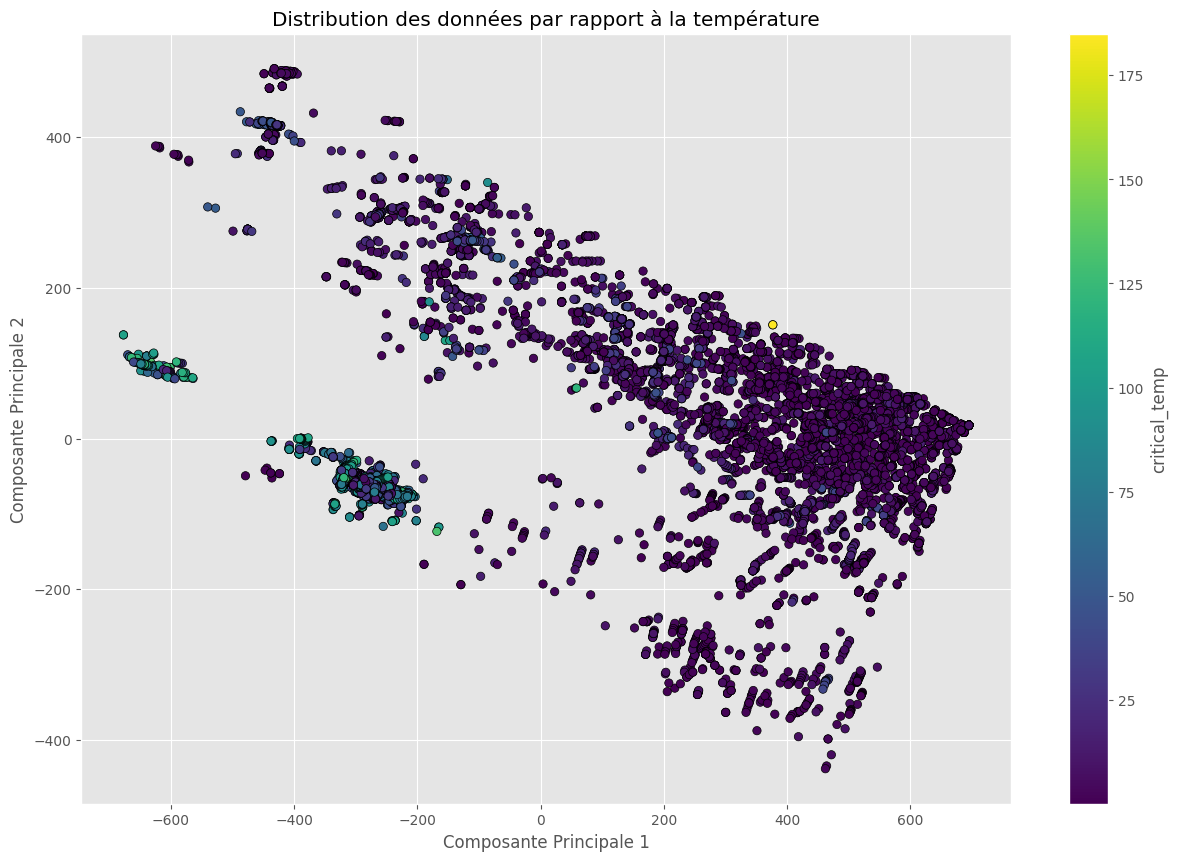

In [16]:
visualisation(X_selected_df)

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Nombre de composantes à sélectionner (20)

# Appliquer l'ACP sur les données
X_pca = pca.fit_transform(X_all)

# les poids des CP (Composants principales)
weights = pca.explained_variance_ratio_

# Obtenir les composantes principales
components = pca.components_

X_pca_df = pd.DataFrame(data=X_pca, columns=[f'Component_{i}' for i in range(1, pca.n_components_ + 1)])

X_pca_df.head()

Component_1  Component_2  Component_3  Component_4  Component_5  \
0 -5112.112376   -13.676570  -183.974988   243.558014   399.068233   
1 -4494.358435  1679.418234  -813.915041   819.390570   396.775639   
2 -5074.259427     5.773309  -104.406219   267.899431   415.052072   
3 -5093.182899    -3.934807  -144.192239   255.717805   407.057934   
4 -5149.907354   -33.306015  -263.561863   219.257385   382.820425   

   Component_6  Component_7  Component_8  Component_9  Component_10  
0   -11.573603    28.198020  -223.570853    -3.391207    -38.990447  
1   443.002980    31.217875  -209.529386    72.915596     -0.036164  
2   -29.788628    19.570868  -214.061071    -7.794930    -39.544349  
3   -20.754785    23.912004  -218.805264    -5.603401    -39.098365  
4     6.905230    37.195960  -232.790311     0.793710    -37.167546

<Axes: title={'center': 'Relation entre les features et les composantes principales'}>

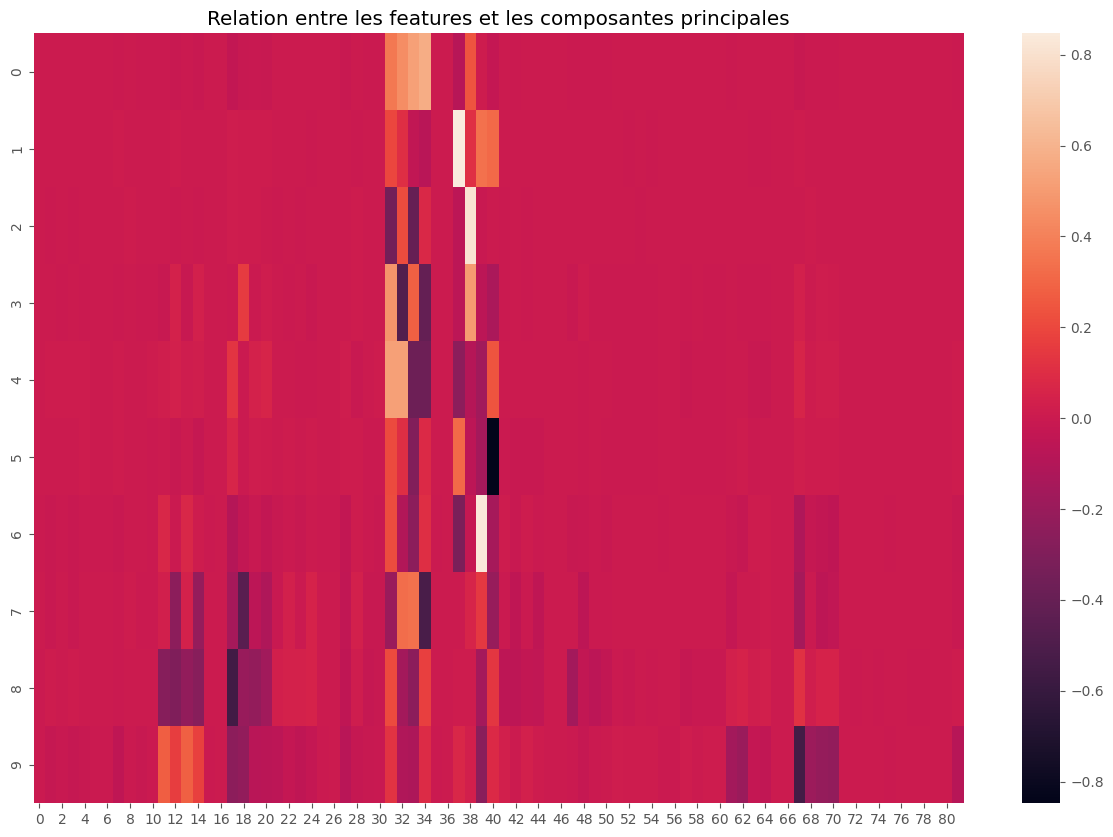

In [18]:
plt.figure(figsize = (15, 10))
plt.title("Relation entre les features et les composantes principales")
sns.heatmap(components)

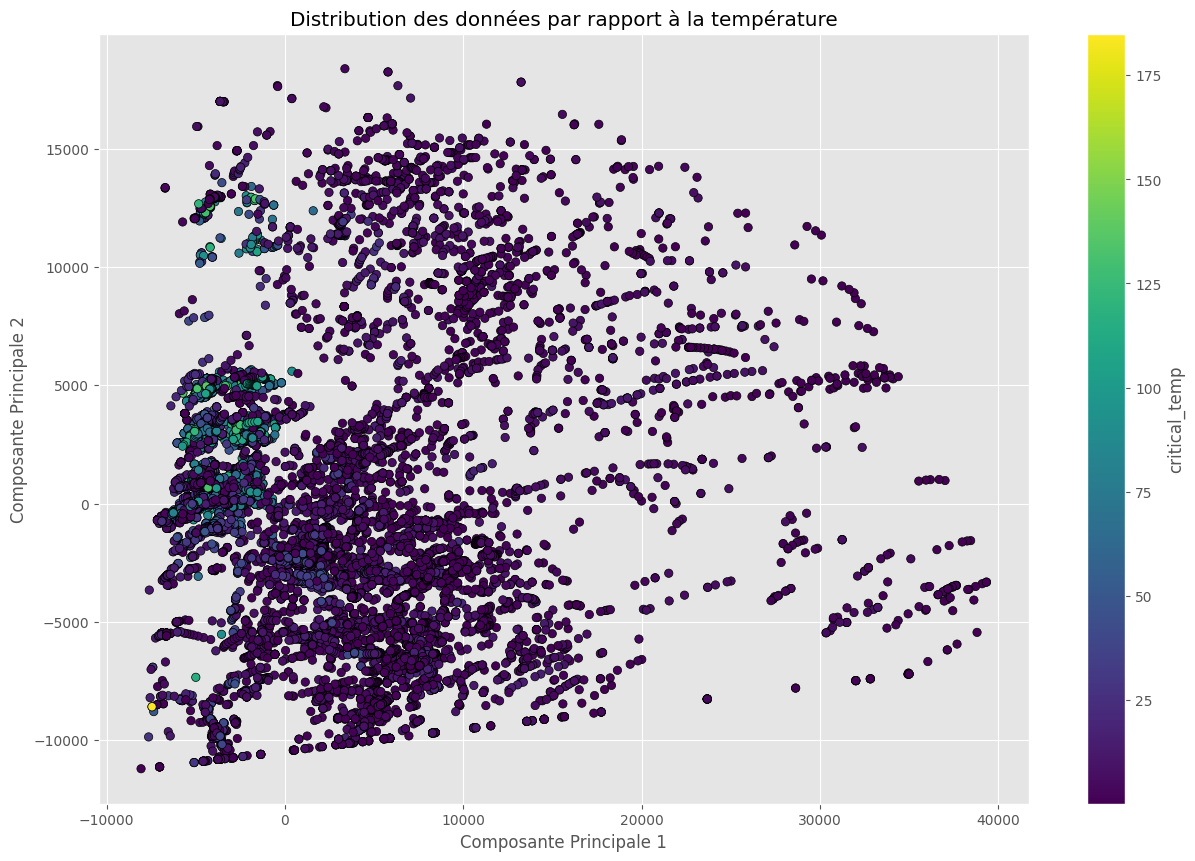

In [19]:
visualisation(X_pca_df)

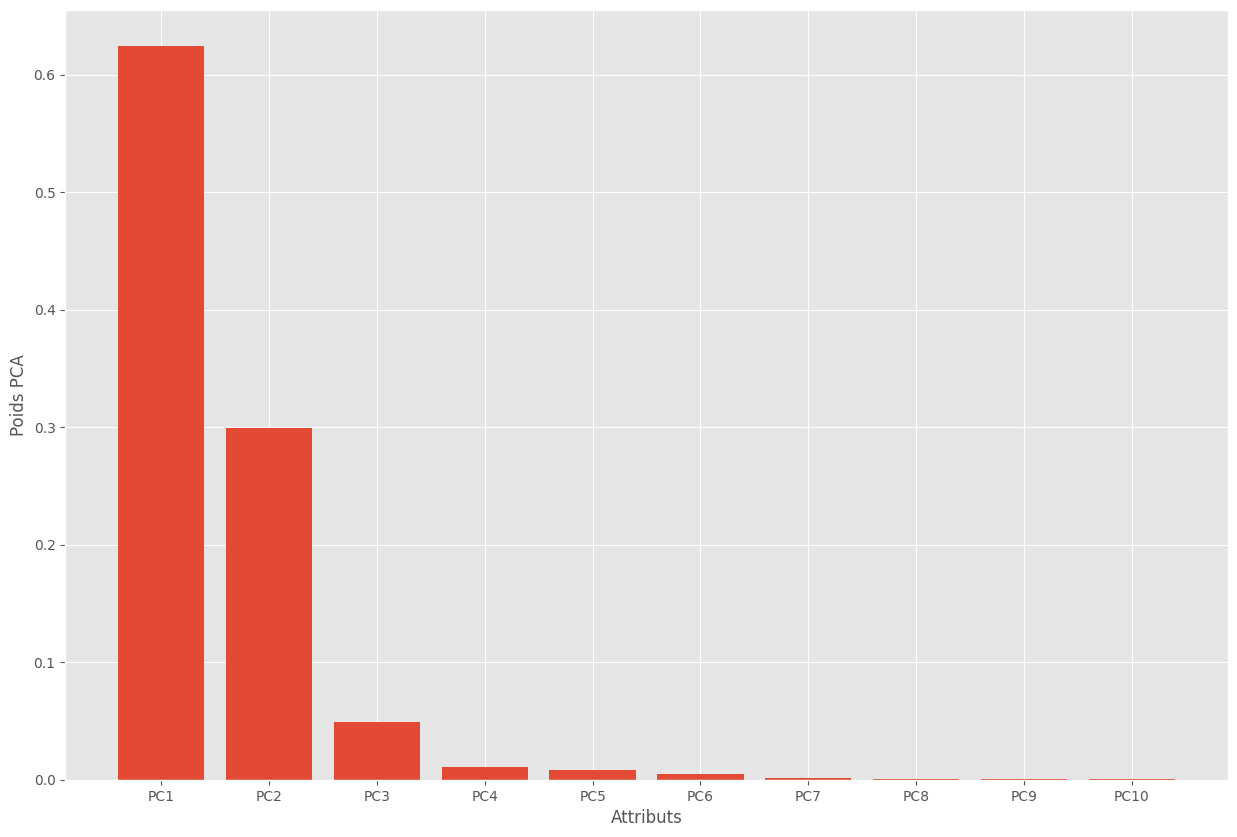

In [20]:
# Visualisation de la distribution des poids
plt.figure(figsize = (15, 10))
plt.bar(['PC{}'.format(i+1) for i in range(10)], weights)
plt.xlabel('Attributs')
plt.ylabel('Poids PCA')
plt.show()

## **Selection des features pertinantes basée sur la connaissance du domaine**

In [21]:
df1.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

Il n'a une répétitions de features . Certains features ont été obtenu par différentes mesures statistiques (moyenne, moyenne pondérée, moyenne géométrique, etc.) pour les mêmes propriétés sous-jacentes (masse atomique, la conductivité thermique, rayon atomique, etc.). Supprimer ces colonnes est judicieux pour éviter la redondance des données

In [22]:
features_pertinantes = ['number_of_elements', 'mean_atomic_mass', 'mean_fie', 'mean_atomic_radius', 'mean_Density', 'mean_ElectronAffinity', 'mean_FusionHeat', 'mean_ThermalConductivity', 'mean_Valence', 'critical_temp']

In [23]:
Xfeatures_p = df1[features_pertinantes]
Xfeatures_p.head()

number_of_elements  mean_atomic_mass  mean_fie  mean_atomic_radius  \
0                   4         88.944468   775.425              160.25   
1                   5         92.729214   766.440              161.20   
2                   4         88.944468   775.425              160.25   
3                   4         88.944468   775.425              160.25   
4                   4         88.944468   775.425              160.25   

   mean_Density  mean_ElectronAffinity  mean_FusionHeat  \
0    4654.35725                81.8375           6.9055   
1    5821.48580                90.8900           7.7844   
2    4654.35725                81.8375           6.9055   
3    4654.35725                81.8375           6.9055   
4    4654.35725                81.8375           6.9055   

   mean_ThermalConductivity  mean_Valence  critical_temp  
0                107.756645          2.25           29.0  
1                172.205316          2.00           26.0  
2                107.756645          2.25           19.0  
3                107.756645          2.25           22.0  
4                107.756645          2.25           23.0

In [24]:
Xfeatures_p.shape

(21263, 10)

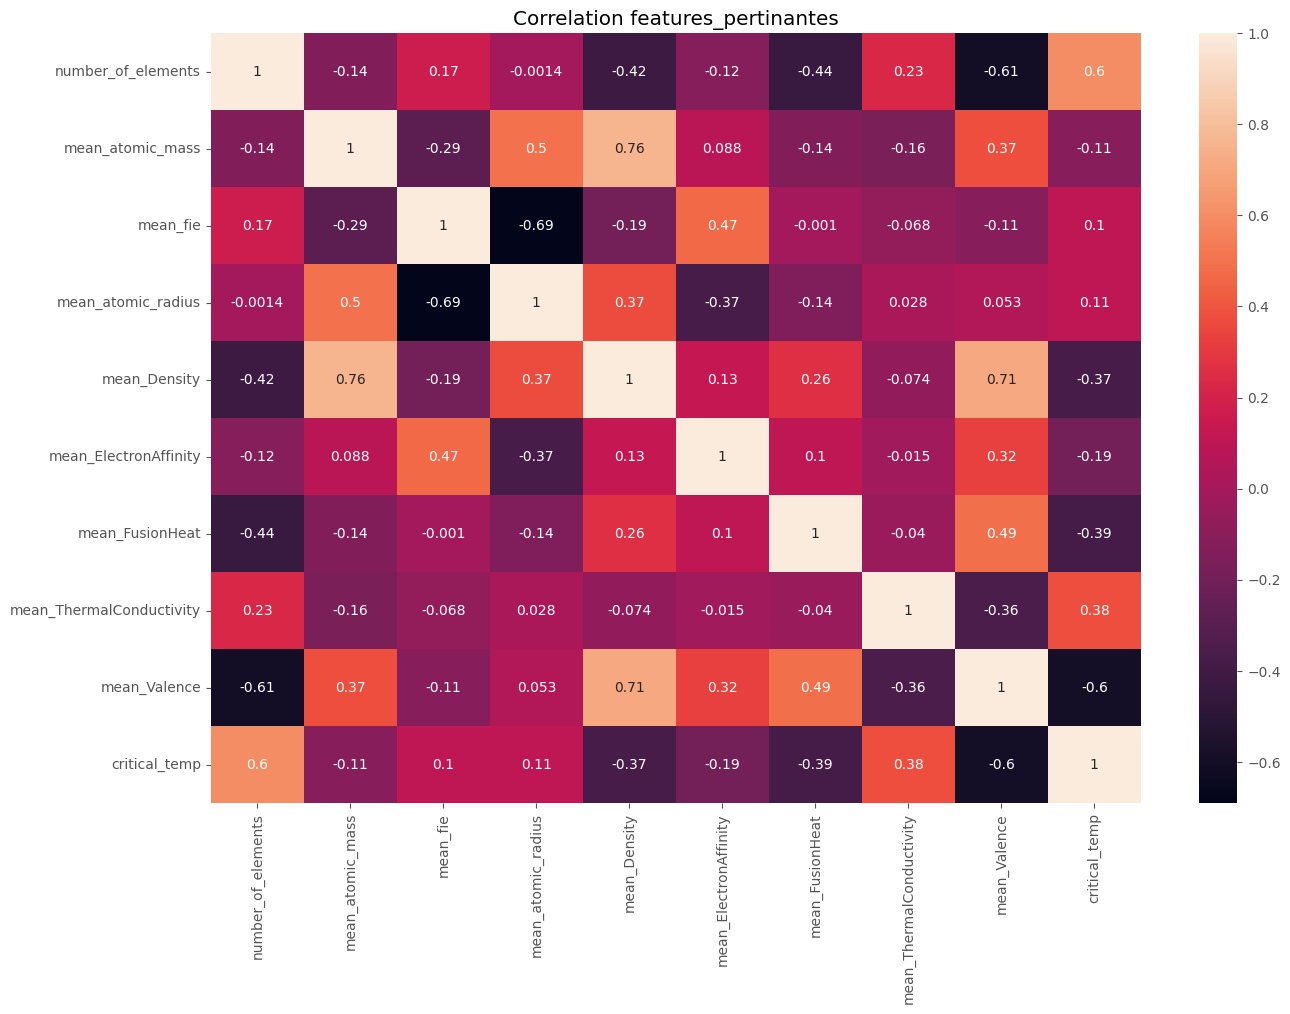

In [25]:
plt.figure(figsize = (15, 10))
plt.title("Correlation features_pertinantes")
sns.heatmap(Xfeatures_p.corr(), annot=True)
plt.show()

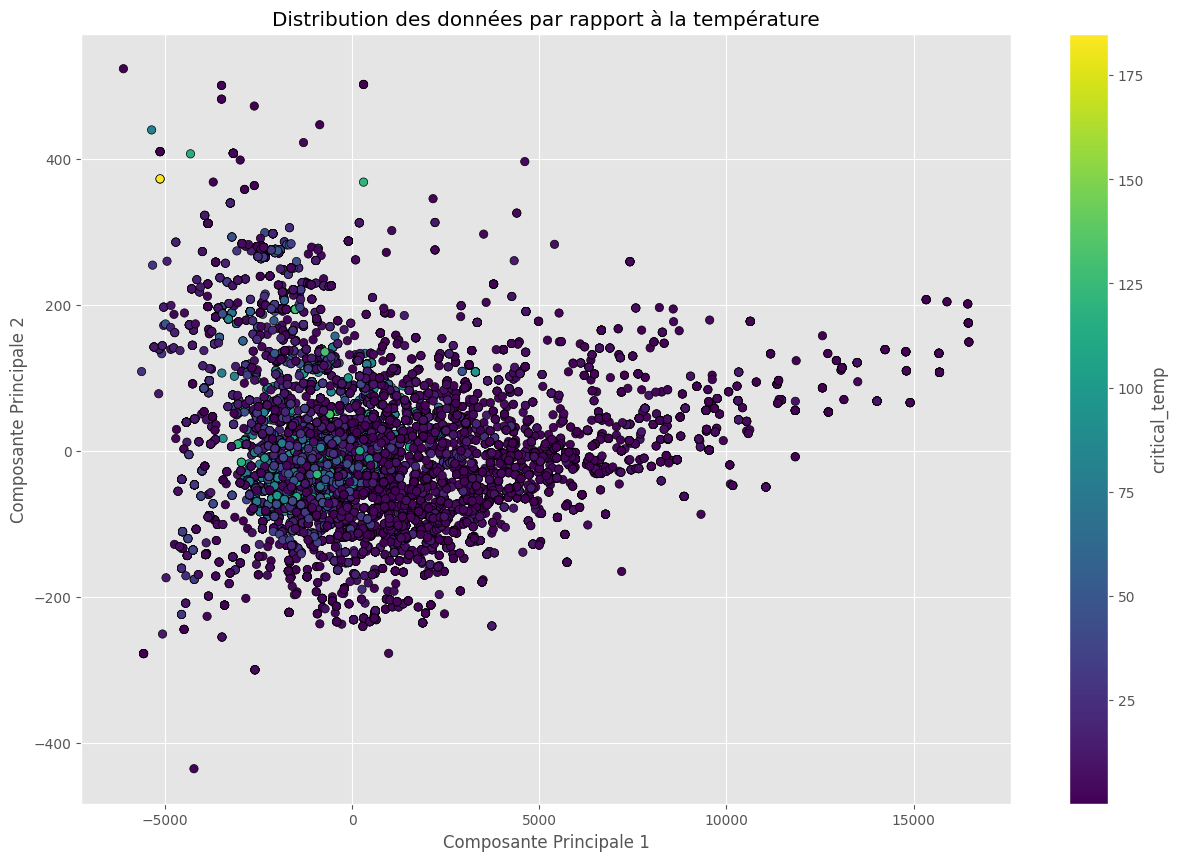

In [26]:
visualisation(Xfeatures_p)

L'on garde la df **Xfeatures_p** sur le quel l'on pourra evaluer nos différents modèles

## **Selection des features avec une correlation supérieur à un seuil**

In [27]:
def correlation(df, threshold):
    col_corr = []  # Ensemble contenant les noms des colonnes corrélées
    corr_matrix = df.corr()  # Calcul de la matrice de corrélation
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Nous nous intéressons à la valeur absolue du coefficient
                colname = corr_matrix.columns[i]  # Récupération du nom de la colonne
                col_corr.append(colname)  # Ajout du nom de la colonne à l'ensemble
    return col_corr  # Retourne l'ensemble des colonnes corrélées

In [28]:
corr_features = correlation(X_all, 0.8)
X_seuil_cor = X_all.drop(corr_features,axis=1)
X_seuil_cor.head()

number_of_elements  mean_atomic_mass  range_atomic_mass  \
0                   4         88.944468          122.90607   
1                   5         92.729214          122.90607   
2                   4         88.944468          122.90607   
3                   4         88.944468          122.90607   
4                   4         88.944468          122.90607   

   wtd_range_atomic_mass  mean_fie  wtd_mean_fie  wtd_entropy_fie  range_fie  \
0              31.794921   775.425   1010.268571         0.791488      810.6   
1              36.161939   766.440   1010.612857         0.807078      810.6   
2              35.741099   775.425   1010.820000         0.773620      810.6   
3              33.768010   775.425   1010.544286         0.783207      810.6   
4              27.848743   775.425   1009.717143         0.805230      810.6   

   wtd_range_fie  mean_atomic_radius  ...  range_FusionHeat  \
0     735.985714              160.25  ...            12.878   
1     743.164286              161.20  ...            12.878   
2     743.164286              160.25  ...            12.878   
3     739.575000              160.25  ...            12.878   
4     728.807143              160.25  ...            12.878   

   mean_ThermalConductivity  wtd_mean_ThermalConductivity  \
0                107.756645                     61.015189   
1                172.205316                     61.372331   
2                107.756645                     60.943760   
3                107.756645                     60.979474   
4                107.756645                     61.086617   

   gmean_ThermalConductivity  entropy_ThermalConductivity  \
0                   7.062488                     0.308148   
1                  16.064228                     0.847404   
2                   7.062488                     0.308148   
3                   7.062488                     0.308148   
4                   7.062488                     0.308148   

   wtd_entropy_ThermalConductivity  range_ThermalConductivity  range_Valence  \
0                         0.262848                  399.97342              1   
1                         0.567706                  429.97342              2   
2                         0.250477                  399.97342              1   
3                         0.257045                  399.97342              1   
4                         0.272820                  399.97342              1   

   wtd_range_Valence  critical_temp  
0           1.085714           29.0  
1           1.128571           26.0  
2           1.114286           19.0  
3           1.100000           22.0  
4           1.057143           23.0  

[5 rows x 28 columns]

Text(0.5, 1.0, 'Correlation  features seuil de correlation')

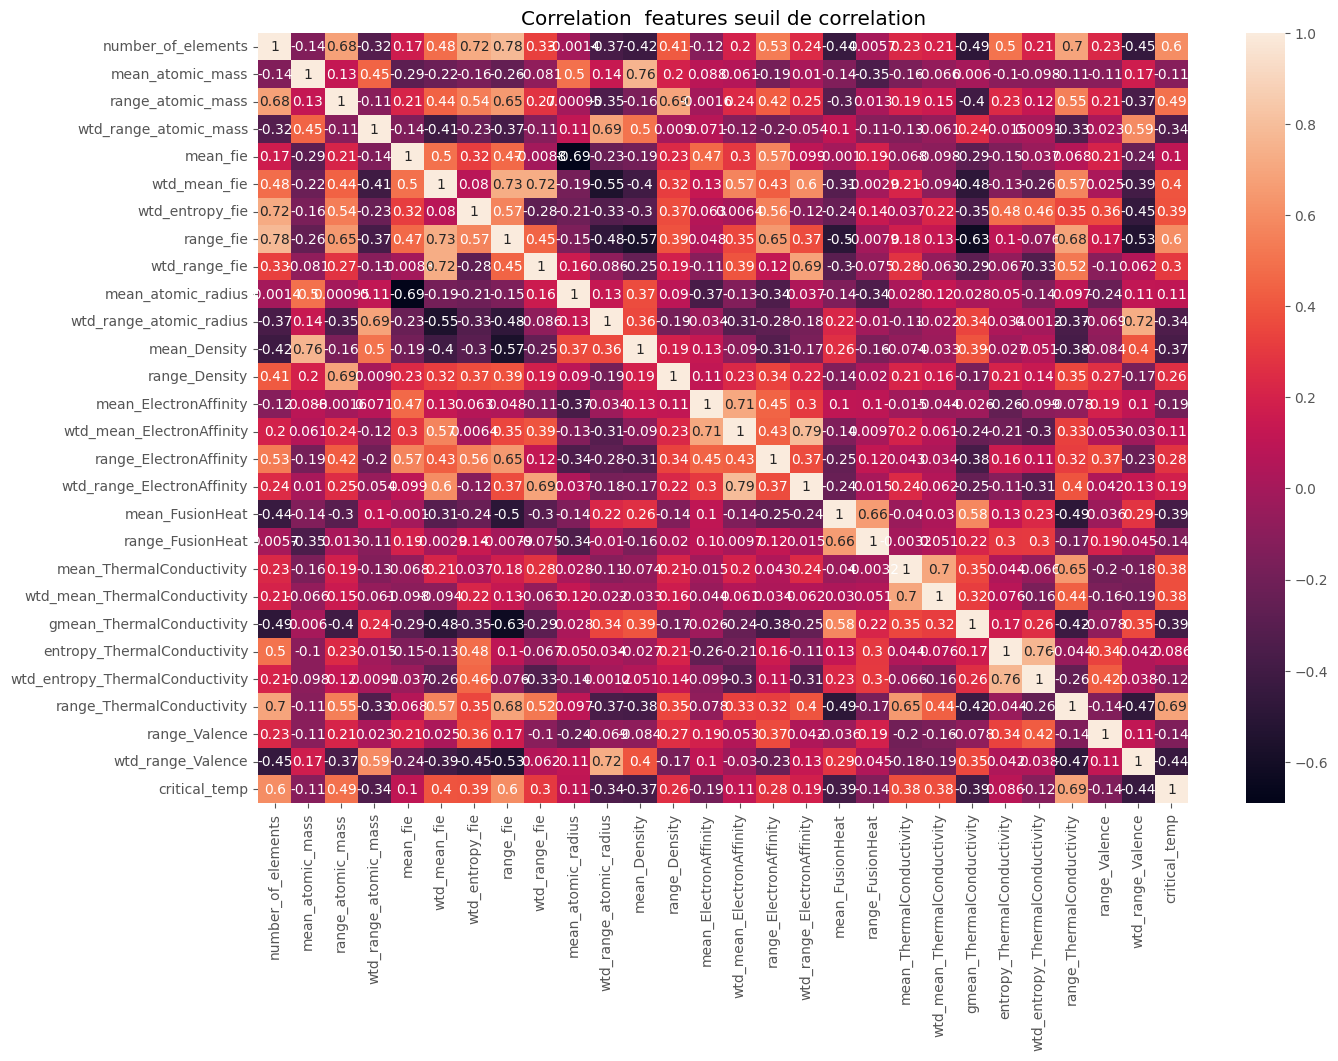

In [29]:
#Calculer la matrice de correlation
plt.figure(figsize = (15, 10))
sns.heatmap(data = X_seuil_cor.corr(), annot=True)
plt.title("Correlation  features seuil de correlation")

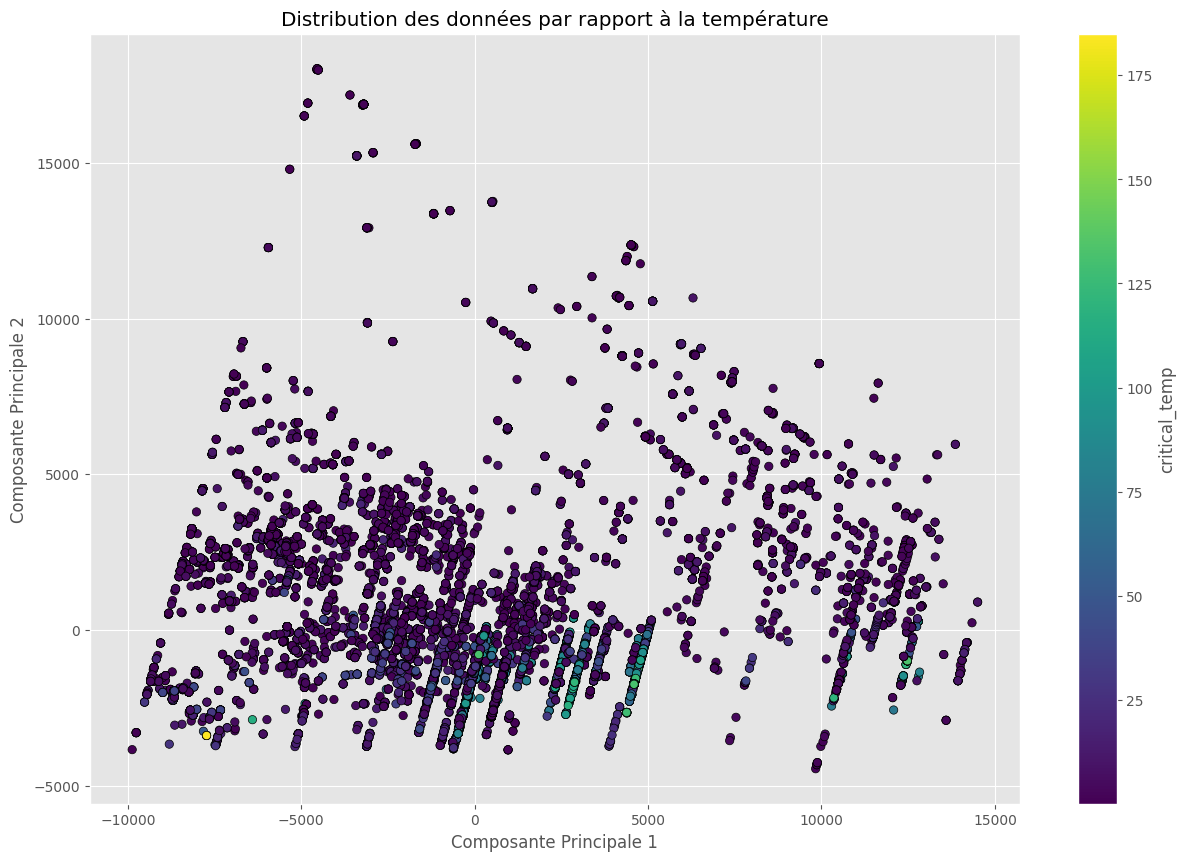

In [30]:
visualisation(X_seuil_cor)

In [31]:
from sklearn.model_selection import learning_curve

def courbe_apprentissage(model, name, Xtrain, Ytrain):
  train_sizes, train_scores, val_scores = learning_curve(model, Xtrain, Ytrain, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

  train_rmse = np.sqrt(-train_scores.mean(axis=1))
  val_rmse = np.sqrt(-val_scores.mean(axis=1))

  plt.figure(figsize=(15, 10))
  plt.plot(train_sizes, train_rmse, label='Training RMSE')
  plt.plot(train_sizes, val_rmse, label='Validation RMSE')
  plt.xlabel('Training Set Size')
  plt.ylabel('RMSE')
  plt.title(f'Learning Curve  {name}')
  plt.legend()
  plt.show()

In [32]:
def residu(y_pred):
  # Calcul des résidus
  residuals = Ytest - y_pred

  # Tracer un graphique des résidus
  plt.figure(figsize=(10, 6))
  plt.scatter(Ytest, residuals, color='blue', alpha=0.1)
  plt.axhline(y=0, color='red', linestyle='--')
  plt.title('Graphique des résidus')
  plt.xlabel('Valeurs réelles')
  plt.ylabel('Résidus')
  plt.show()


## **Ensemble continue régression**

In [33]:
# Séparation des données (validation simple). On peut demander la validation croisée)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest= train_test_split(Xfeatures_p, Y, test_size=0.3, random_state=0) #En changeant X_all par X_pca_df, X_selected_df, Xfeatures_p et X_seuil_cor l'on arrive à faire une evaluation des différent model
Xtrain.shape, Xtest.shape

((14884, 10), (6379, 10))

## **LinearRegression**

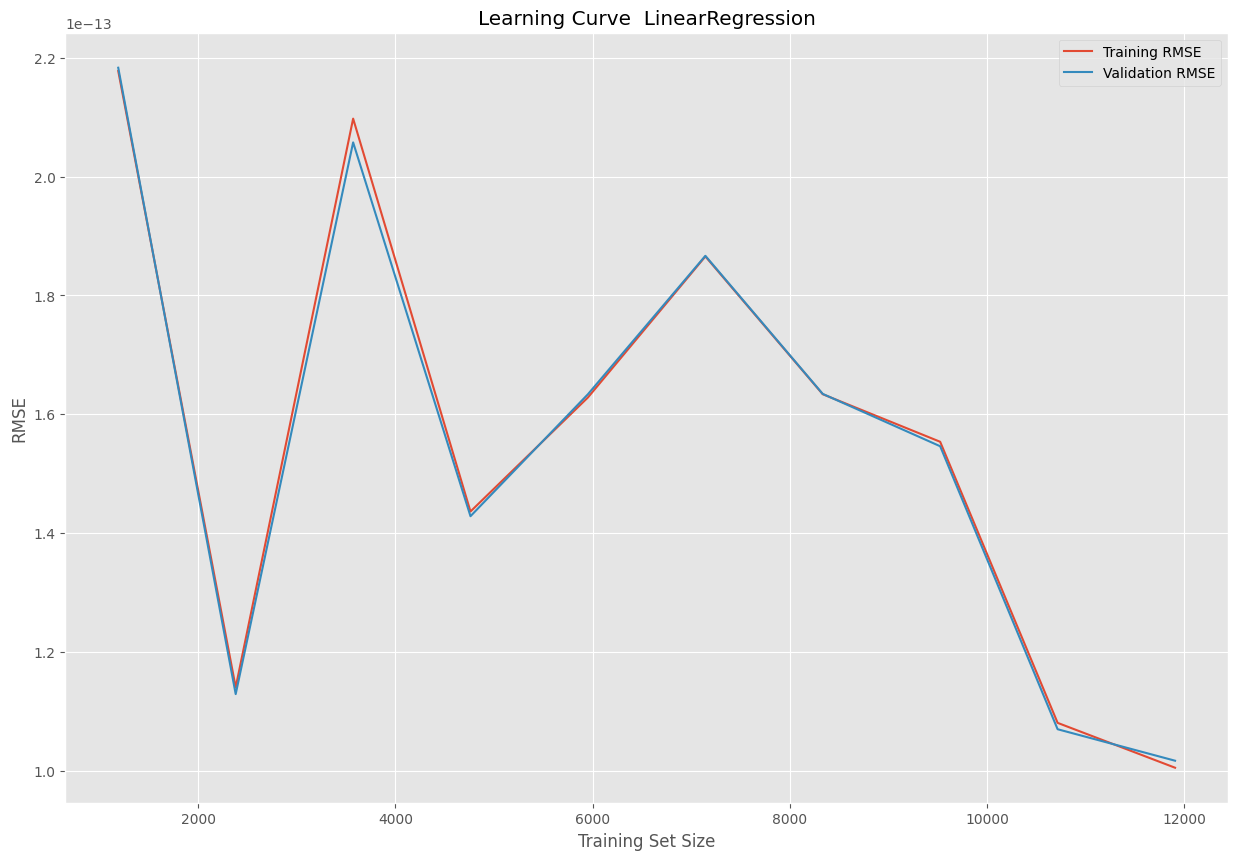

Modèle          RMSE  R^2
0  LinearRegression  8.055894e-14  1.0

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr_model = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
lr_model.fit(Xtrain, Ytrain)

# Prédiction sur les données de test
y_pred_lr = lr_model.predict(Xtest)

# Évaluation du modèle en calculant l'erreur quadratique moyenne (RMSE)
rmse_lr = mean_squared_error(Ytest, y_pred_lr, squared=False)

r2_lr = r2_score(Ytest, y_pred_lr)

# Créer un DataFrame avec les résultats
results_lr = pd.DataFrame({
    'Modèle': ['LinearRegression'],
    'RMSE': [rmse_lr],
    'R^2': [r2_lr]
})

courbe_apprentissage(lr_model, 'LinearRegression',Xtrain, Ytrain)

results_lr

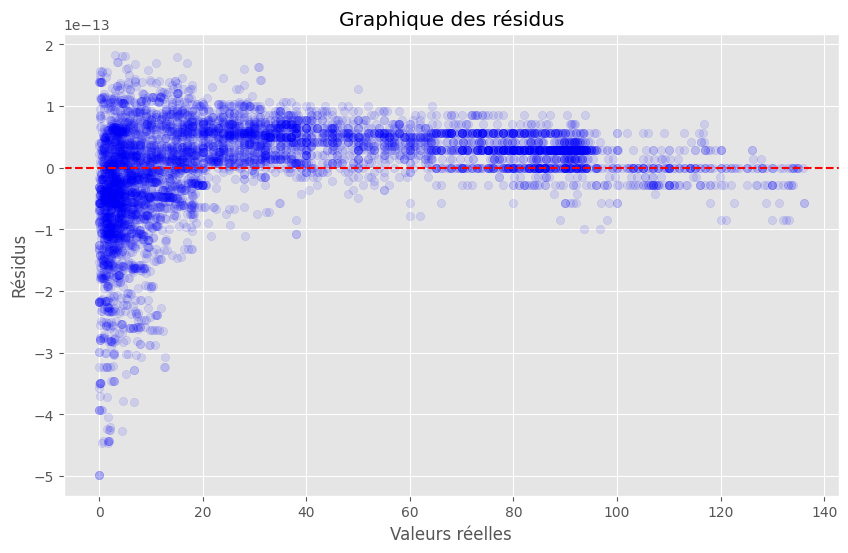

In [35]:
residu(y_pred_lr)

## **DecisionTreeRegressor**

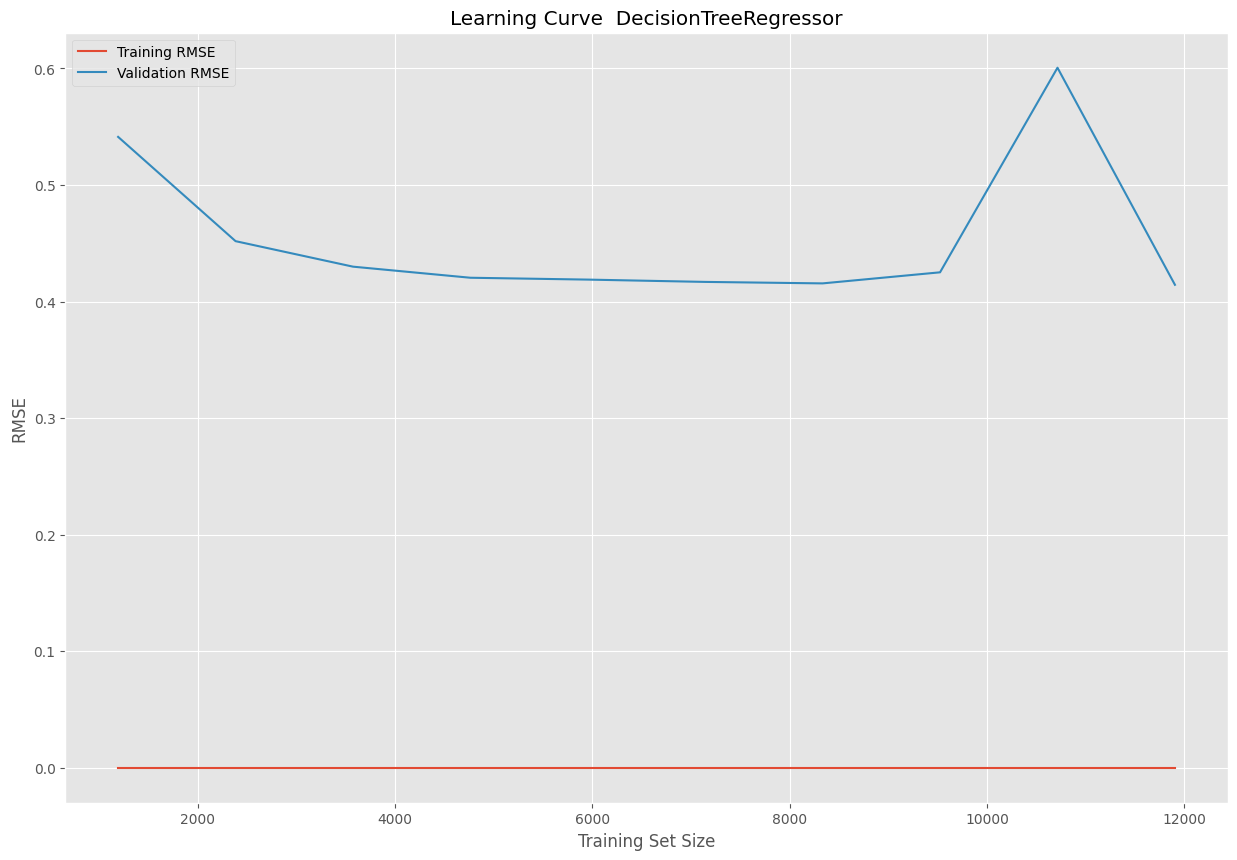

Modèle      RMSE       R^2
0  DecisionTreeRegressor  0.047566  0.999998

In [36]:
from sklearn.tree import DecisionTreeRegressor

# Création du modèle DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

# Entraînement du modèle sur les données d'entraînement
tree_model.fit(Xtrain, Ytrain)

# Prédiction sur les données de test
y_pred_tree = tree_model.predict(Xtest)

# Évaluation du modèle en calculant l'erreur quadratique moyenne (RMSE)
rmse_tree = mean_squared_error(Ytest, y_pred_tree, squared=False)

r2_tree = r2_score(Ytest, y_pred_tree)

courbe_apprentissage(tree_model, 'DecisionTreeRegressor',Xtrain, Ytrain)

results_tree_model = pd.DataFrame({
    'Modèle': ['DecisionTreeRegressor'],
    'RMSE': [rmse_tree],
    'R^2': [r2_tree]
})

results_tree_model

## **GradientBoostingRegressor**

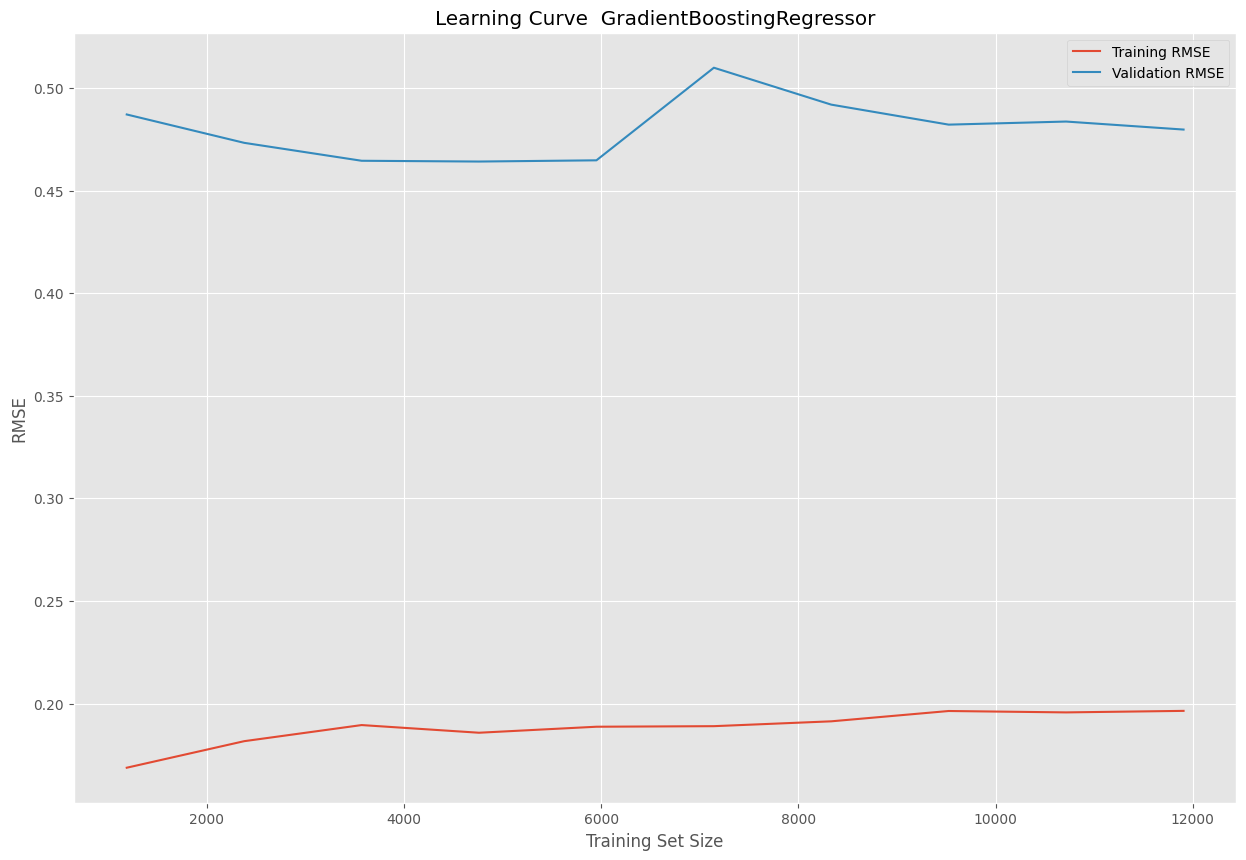

Modèle      RMSE       R^2
0  LinearRegression  0.204437  0.999964

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# Création du modèle GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Entraînement du modèle sur les données d'entraînement
gb_model.fit(Xtrain, Ytrain)

# Prédiction sur les données de test
y_pred_gb = gb_model.predict(Xtest)

# Évaluation du modèle en calculant l'erreur quadratique moyenne (RMSE)
rmse_gb = mean_squared_error(Ytest, y_pred_gb, squared=False)

# Calcul du coefficient de détermination R^2
r2_gb = r2_score(Ytest, y_pred_gb)


courbe_apprentissage(gb_model, "GradientBoostingRegressor",Xtrain, Ytrain)

results_gb_model = pd.DataFrame({
    'Modèle': ['LinearRegression'],
    'RMSE': [rmse_gb],
    'R^2': [r2_gb]
})

results_gb_model

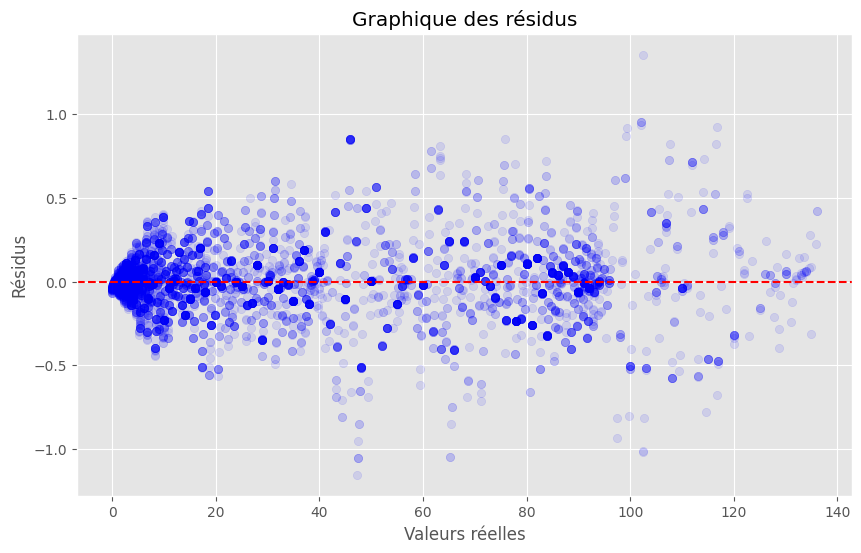

In [38]:
residu(y_pred_gb)

## **Réseau de neurones**

In [39]:
import tensorflow as tf
from tensorflow import keras

# Création du modèle de réseau de neurones
rn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(Xtrain.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Couche de sortie sans activation pour une régression
])

# Compilation du modèle avec une fonction de perte et un optimiseur
rn.compile(loss='mean_squared_error', optimizer='adam')

rn.fit(Xtrain, Ytrain, epochs=50, batch_size=32)

# Prédiction sur les données de test
y_pred_nn = rn.predict(Xtest).flatten()

# Évaluation du modèle en calculant l'erreur quadratique moyenne (RMSE)
rmse_rn = mean_squared_error(Ytest, y_pred_nn, squared=False)

# Calcul du coefficient de détermination R^2
r2_rn = r2_score(Ytest, y_pred_nn)

results_rn = pd.DataFrame({
    'Modèle': ['Reseau de neurone'],
    'RMSE': [rmse_rn],
    'R^2': [r2_rn]
})

results_rn

Epoch 1/50
466/466 [==============================] - 2s 3ms/step - loss: 1086.3210
Epoch 2/50
466/466 [==============================] - 1s 3ms/step - loss: 39.9687
Epoch 3/50
466/466 [==============================] - 1s 2ms/step - loss: 15.1101
Epoch 4/50
466/466 [==============================] - 1s 2ms/step - loss: 36.4577
Epoch 5/50
466/466 [==============================] - 1s 2ms/step - loss: 25.7508
Epoch 6/50
466/466 [==============================] - 1s 2ms/step - loss: 62.4588
Epoch 7/50
466/466 [==============================] - 1s 2ms/step - loss: 42.6193
Epoch 8/50
466/466 [==============================] - 1s 2ms/step - loss: 15.8748
Epoch 9/50
466/466 [==============================] - 1s 2ms/step - loss: 31.0740
Epoch 10/50
466/466 [==============================] - 1s 2ms/step - loss: 199.5861
Epoch 11/50
466/466 [==============================] - 1s 2ms/step - loss: 0.7866
Epoch 12/50
466/466 [==============================] - 1s 2ms/step - loss: 1.2897
Epoch 13/50


Modèle       RMSE       R^2
0  Reseau de neurone  19.540599  0.675297

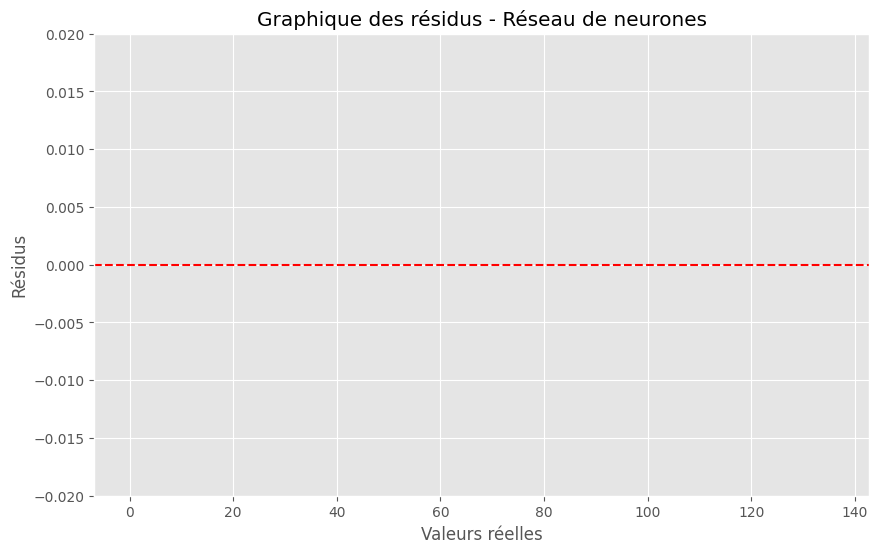

In [40]:

# Calcul des résidus
residuals_rn = Ytest - y_pred_nn

# Tracer un graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(Ytest, residuals_rn, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Graphique des résidus - Réseau de neurones')
plt.xlabel('Valeurs réelles')
plt.ylabel('Résidus')
plt.ylim(-.02, .02)
plt.show()
